In [8]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os
import pickle

# Creating dataset

In [2]:
path = '../input/facemask/train'

In [3]:
def get_images_paths(input_path):
    images_paths = []
    if input_path[-1] != '/':
        input_path += '/'
    
    items = os.listdir(input_path)
    for item in items:
        extension = item[-3:]
        if extension in ['png', 'jpg']:
            images_paths.append(input_path + item)
        else:
            images_paths.extend(get_images_paths(input_path + item))
    
    return images_paths

In [4]:
paths = get_images_paths(path)

images = []
labels = []

for i, path in enumerate(paths):
    if i % 100 == 0:
        print(i, 'from', len(paths))
    
    image = Image.open(path)
    image = np.array(image)
    images.append(image)
    
    label = path.split('/')[-2]
    labels.append(label)

0 from 772
100 from 772
200 from 772
300 from 772
400 from 772
500 from 772
600 from 772
700 from 772


# Checking class sizes

In [5]:
np.unique(labels, return_counts=True)

(array(['mask_weared_incorrect', 'with_mask', 'without_mask'], dtype='<U21'),
 array([229, 277, 266]))

# Dataset preview

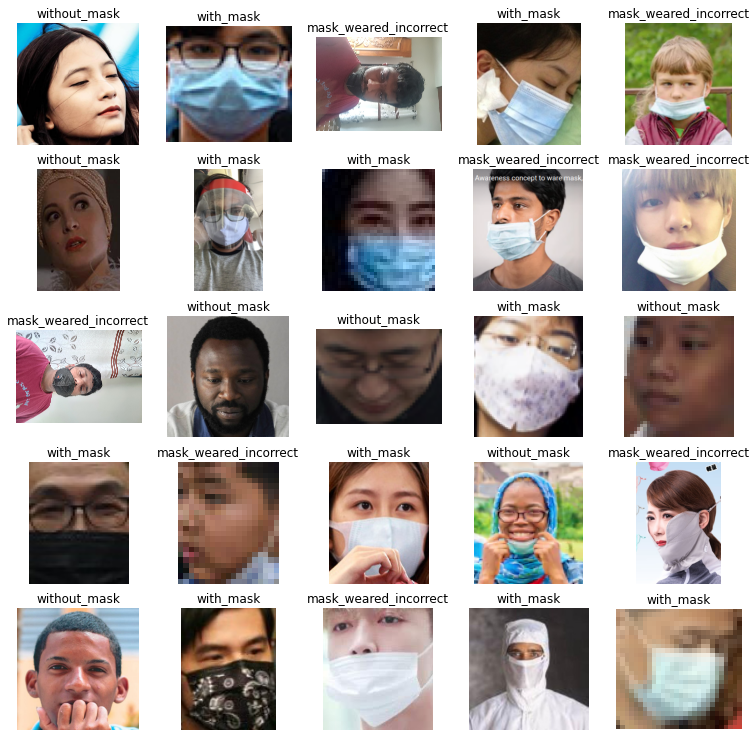

In [6]:
n = 25

random_indices = np.random.choice(len(labels), size=n, replace=False)
plt.figure(figsize=(13,13))
for i, idx in enumerate(random_indices):
    image = images[idx]
    label = labels[idx]
    
    plt.subplot(5, 5, i+1)
    plt.imshow(image)
    plt.title(label)
    plt.axis('off')
plt.show()

# Saving the dataset to a file

In [9]:
with open('facemask.pkl', 'wb') as file:
    dataset = {'images':images, 'labels':labels}
    pickle.dump(dataset, file)